In [171]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [172]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
print(X[0])
print(n_samples, n_features)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
1083 64


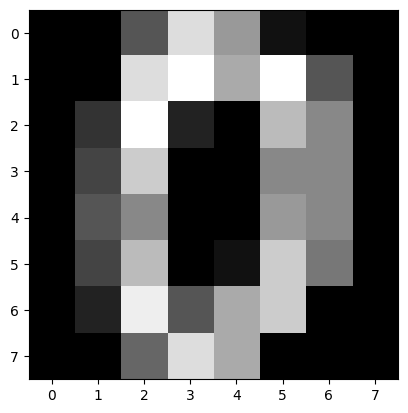

In [173]:
# reshape X[0] to a 2D array
img = np.reshape(X[0], (8, 8))

# plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [174]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=124)

basic_classifier = svm.SVC(gamma=0.001)
basic_classifier.fit(x_train, y_train)
predicted = basic_classifier.predict(x_test)

# print("Classification report for classifier %s:\n%s\n")
# print(classification_report(y_test, predicted))

print("Accuracy score: ", accuracy_score(y_test, predicted))

Accuracy score:  0.996309963099631


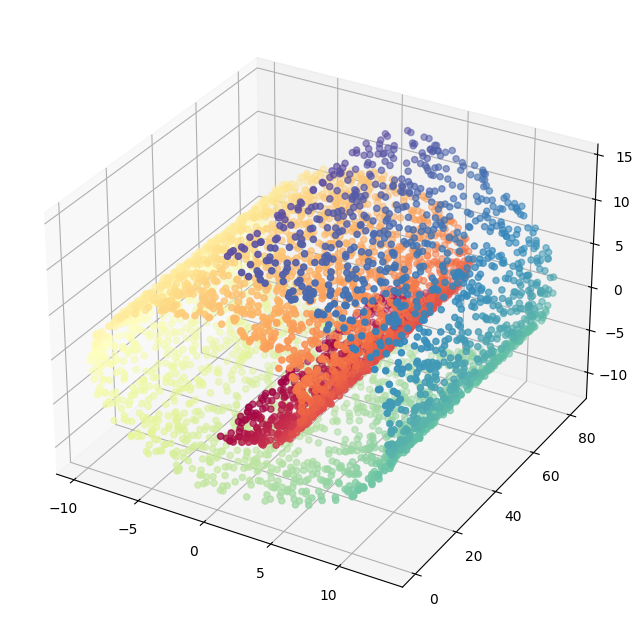

In [175]:
def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

X_swiss, Y_swiss = make_swiss_roll(n_samples = 5000, noise=0.1, random_state=42)

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=Y_swiss, cmap=plt.cm.Spectral)
plt.show()

# Neighborhood Preserving Embedding (NPE)
![alt text](img/NPE_algorithm.png "Algorithm")


## Step 1: KNN from scratch

In [176]:
X = x_train
y = y_train
# X = X_swiss
# y = Y_swiss

In [177]:
# k = 20
# Q = []
# index_Q = []

# for x_1 in x_train:
#     distance = []

#     set_x_1 = set(x_1)
#     j = 0
#     for x_2 in x_train:
#         # if they are differente points       IMPORTANT BEACUSE OF THE REPEATED POINTS
#         distance.append((x_2, np.linalg.norm(x_1 - x_2), j))
#         j += 1
#     distance.sort(key=lambda x: x[1])
#     l = [point for point, dist, i in distance[:k]]
#     Q.append(l)
#     index_Q.append([i for point, dist, i in distance[:k]])

# print(distance[:k])
    

In [178]:
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model
k = 11  # You can change this value to the number of neighbors you want
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', n_jobs=-1).fit(X)
k = k - 1 #This becase the first neighbor is the point itself

# Query for nearest neighbors
Q_distances = []
Q_indices = []
for i in range(len(X)):
    distance, index = nbrs.kneighbors([X[i]])
    # print("distance: ", distance[0])
    print("index: ", index[0])
    Q_distances.append(distance[0][1:])
    Q_indices.append(index[0][1:])

# distances: Array of distances to the k nearest neighbors
# indices: Array of indices of the k nearest neighbors in x_train

# print(Q_distances)
# print(Q_indices[0])


index:  [  0 759 253 274 540 487 264  66 567 593 697]
index:  [  1 740 691 221  23 431 231 114 448 286 219]
index:  [  2 273  93  56 304 590  97 693 635 126 257]
index:  [  3 267 359 597 781 107 747 421 670 171 339]
index:  [  4 597 670 171 107  50 375 808 476 267   3]
index:  [  5 526 791  11  45 396  90  24 120 522 721]
index:  [  6 319 784 515 616 676 724 636 603  73 719]
index:  [  7 732 143 444 162 318 169 207 130 698 382]
index:  [  8  44 777 153 521 209 150 226 193 337 509]
index:  [  9 202 373 182 687 596 478 640  28 715 802]
index:  [ 10 801 347 330  69 491 543 707  74 186 556]
index:  [ 11   5 526 396  45 766 574 789 706 642 791]
index:  [ 12 811 329 160 441 647 438  91 343 299 668]
index:  [ 13 720 105 606 352 437 533 719 636 776 344]
index:  [ 14 141 591  62 783 219 614 704 447 431 715]
index:  [ 15 104 368 268 264 759 567 568  81  37 593]
index:  [ 16 556  55 354  10 269  49 330 699 707 754]
index:  [ 17  82 551 385 442 550 416 265  56 617 507]
index:  [ 18 626 809  63 447

index:  [ 39 443 390 462 631 125 572 366 484 519 435]
index:  [ 40 405  74 612  56 217 363 178  67 273 635]
index:  [ 41 470 217 304 273  67 265 625  40 635 665]
index:  [ 42 162  27 545 108  43 427 292 513 744 739]
index:  [ 43 744 103 297 739  27 498 256 682 689  80]
index:  [ 44 777   8 153 509 521 150 226 337 209 412]
index:  [ 45   5 791  11 526 120  90 396 520 721 789]
index:  [ 46 339 748 251  78 482  38 465 601 101 142]
index:  [ 47 252 179  87 694 789 128  90 730 570 718]
index:  [ 48 473 441 811 668 696 582 144 505 647 510]
index:  [ 49 767 550 269 380 258 218 635 304 167 599]
index:  [ 50 171 499 552 670 514   4 597 557 107 539]
index:  [ 51 328 794 579 447 338 652 727 584 626  75]
index:  [ 52 386 286 190  25 485 159 403 221 641 260]
index:  [ 53  47 179 252  90 810 789 718 730 237 570]
index:  [ 54 149 246 402 468 428 132 381 408 604 165]
index:  [ 55  16 325  10 556 491 699 258  49 625 330]
index:  [ 56 405 126   2 363  93 635 701  40 507 594]
index:  [ 57 589 538 719 176

## Step 2: Compute the weight matrix W

Each point of the dataset is reconstructed as a linear weighted sum of its neighbors. Since only neighbors participate in reconstruction it is local. Reconstruction is achieved by linear coefficients of weights, hence linear. That is why this method is named as locally linear embedding.\
The weights of points Pi and Pj are independent from each other.\
Rotation, rescalings, and translations of a points and its neighbors are don't affect the local W matrix of the point.\
It is important to note that while solving for W if the number of neighbors is greater than the original dimension D some of the weight coefficients might be zero leading to multiple solutions. This issue can be handled by adding a regularization to the least squares problems penalizing the large weights.

Theconstraint k j=1wij=1meansthattheweightsof linearreconstructionsumtooneforeverypoint.Notethat thefactthatsomeweightsmaybenegativecausestheproblemofexplosionofsomeweightsbecauseverylargepositiveandnegativeweightscancanceleachothertohavea totalsumofone.However,thisproblemdoesnotoccur because,aswewillsee,thesolutiontothisoptimization problemhasaclosedform;thus,weightsdonotexplode.

$$\min \sum_{i}\Vert {\bf x}_{i}-\sum_{j}W_{ij}{\bf x}_{j}\Vert^{2}$$
with contraints $\sum_{j}W_{ij}=1,j=1,2, \ldots, m$

<!-- ![alt text](img/formula_3.png) -->

In [179]:
# tol = 0

# n = len(x_train)
# W = np.zeros((n, n))
# k_1 = np.ones((k))
# I = np.ones((k, 1))

# for i in range(n):

#     # 2D array where the same vector x_train[i] is repeated k times as columns.
#     x_i = np.tile(x_train[i], (k, 1)).T

#     Qi = []
#     for index_Q in Q_indices[i]:
#         Qi.append(x_train[index_Q])
#     neig = np.array(Qi).T

#     Z_i = (x_i - neig).T @ (x_i - neig)
#     # Z_i = Z_i + np.eye(k) * tol * np.trace(Z_i)   # Da mettere???
#     Z_i_inv = np.linalg.inv(Z_i)


#     W_i = (Z_i_inv @ I) / (I.T @ Z_i_inv @ I)

#     for j in range(k):
#         W[i, Q_indices[i][j]] = W_i[j]




In [180]:
len(Q_indices)

812

In [181]:
tol = 1e-5



n = len(X)
# W = np.zeros((n, n))
W = []
k_1 = np.ones((k))
I = np.ones((k, 1))

for i in range(n):
    xi = X[i]
    C = []
    for j in range(k):
        xj = X[Q_indices[i][j]]
        C_aux = []
        for m in range(k):
            xm = X[Q_indices[i][m]]
            C_jk =(xi - xj).T @ (xi - xm)
            C_aux.append(C_jk)
        C.append(C_aux)
    C = np.array(C)
    # print(C.shape)
    C = C + tol * np.eye(*C.shape) # Regularization for C
    # w_bis = np.linalg.solve(C, k_1) # Calculate weights for x_i
    # w_bis = w / w.sum() # Normalize weights; sum(w)=1
    w = np.linalg.inv(C) @ k_1
    w = w / (k_1.T @ np.linalg.inv(C) @ k_1)

    # Create an 1 x n array that will contain a 0 if xj is not a 
    # neighbour of xi, otherwise it will cointain the weight of x_j
    w_real = np.zeros((1, n))
    np.put(w_real, Q_indices[i], w)
    # np.put(w_real, Q_indices[i], w_bis)
    W.append(list(w_real[0]))

W = np.array(W)
print(W.shape)

(812, 812)


## Step 3: Computing the projections

In [183]:
import scipy.sparse.linalg as linalg
# X = X_swiss

d = 2
alpha = 1e-5
A = []

I = np.eye(n)

M = (I - W).T @ (I - W)


# eigvalues, eigvectors = linalg.eigs(M, k=d, which='LM')
eigvalues, eigvectors = np.linalg.eig(M)

# z = eigvectors

        # sort eigenvectors
# pairs = list(zip(eigvalues, eigvectors.T)) # Pair each eigenvalue with its corresponding eigenvector
# pairs.sort(key=lambda x: x[0], reverse=False) # Sort the pairs in ascending order of the eigenvalue
# sorted_eigvalues, sorted_eigvectors = zip(*pairs) # Unpack the sorted pairs
# z = np.array(sorted_eigvectors).T # Convert the sorted eigenvectors back to a 2D array

# Sort the eigenvalues and eigenvectors in ascending order
index_ = np.argsort(np.abs(eigvalues))[1:d+1]
z = eigvectors[:, index_]
print(z.shape)

I = np.eye(X.shape[1])
for i in range(d):
    ai = (X.T @ X) + (alpha * I)
    ai = np.linalg.inv(ai)
    print(ai.shape)
    ai = ai @ X.T @ z[:, i]
    A.append(ai)


A = np.array(A).T
print(A.shape)

(812, 2)
(64, 64)
(64, 64)
(64, 2)


### Transforming the data

In [184]:
A.shape

(64, 2)

In [185]:
x_train_transformed = []
x_test_transformed = []
for i in range(X.shape[0]):
    x_train_transformed.append( A.T @ X[i])
for i in range(len(x_test)):
    x_test_transformed.append( A.T @ x_test[i])
print(x_train_transformed)
x_train_transformed = np.array(x_train_transformed)
x_test_transformed = np.array(x_test_transformed)

x_train_transformed

[array([-0.02694683, -0.05427974]), array([-0.00782336, -0.03607088]), array([ 0.06458815, -0.0197002 ]), array([-0.03225232,  0.03264959]), array([-0.04511714,  0.00100232]), array([-0.0361721 ,  0.04255796]), array([0.00608273, 0.03924085]), array([0.02645513, 0.00020694]), array([-0.00166578,  0.02851685]), array([-0.00890802,  0.01205615]), array([ 0.0557098 , -0.01723554]), array([-0.03275361,  0.0311288 ]), array([0.00421725, 0.03715053]), array([0.0090411 , 0.02143855]), array([-0.00039129,  0.01622155]), array([-0.03001145, -0.06133392]), array([0.04730358, 0.00592612]), array([ 0.07232365, -0.02251846]), array([-0.00097109, -0.02802572]), array([-0.0071037 ,  0.00841729]), array([-0.02786443, -0.06275719]), array([-0.04508161,  0.03579484]), array([0.0076463, 0.0209925]), array([-0.00866504, -0.02523203]), array([-0.02435693,  0.05619813]), array([0.00760317, 0.00454018]), array([-0.04285956,  0.04930147]), array([-0.00551152,  0.01545137]), array([-0.00497428,  0.0015512 ]), 

array([[-0.02694683, -0.05427974],
       [-0.00782336, -0.03607088],
       [ 0.06458815, -0.0197002 ],
       ...,
       [-0.00027589, -0.00382714],
       [-0.02879577,  0.03992304],
       [ 0.00988222,  0.04053877]])

In [186]:
x_train_transformed = np.real(x_train_transformed)
x_test_transformed = np.real(x_test_transformed)


basic_classifier = svm.SVC(gamma=0.001)
basic_classifier.fit(x_train_transformed, y_train)
predicted = basic_classifier.predict(x_test_transformed)

# print("Classification report for classifier %s:\n%s\n")
# print(classification_report(y_test, predicted))

print("Accuracy score: ", accuracy_score(y_test, predicted))

Accuracy score:  0.12177121771217712


## Step 4: Visualizing the results

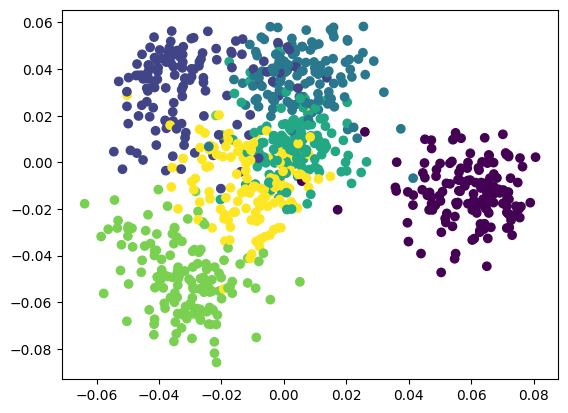

In [187]:


plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y)
plt.show()


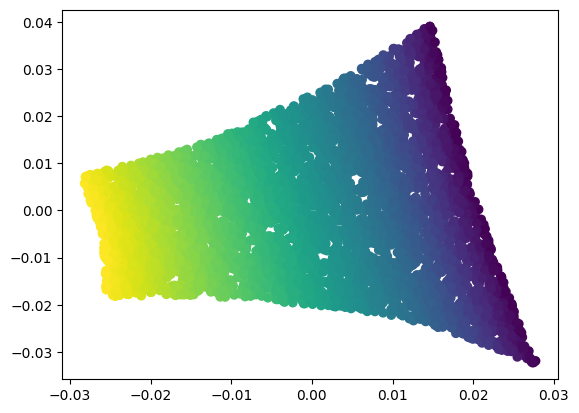

In [188]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X_swiss, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=Y_swiss)
plt.show()


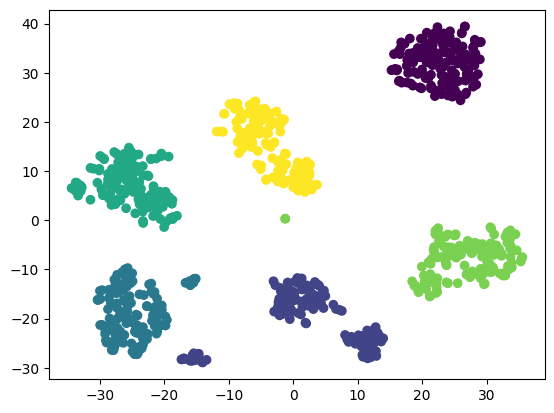

In [189]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

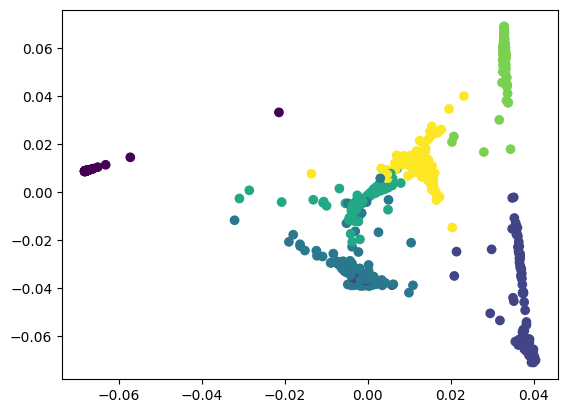

In [190]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=d, n_neighbors=k)
lle_data = lle.fit_transform(X)


plt.scatter(lle_data[:, 0], lle_data[:, 1], c=y_train)
plt.show()


[5.336924479002934e-17, 1.2577368922855241e-08, 2.8852503251537177e-06, 3.9168319134666046e-06, 1.483166139871425e-05, 2.6432973199950186e-05, 8.098138580644574e-05, 0.0002478928927177285, 0.00038261347308358193, 0.0004636267083731307, 0.0005617122346365519, 0.0006490289258128288, 0.0009553059814434845, 0.001063691687749234, 0.0013098664951440736, 0.0016963920540143068, 0.0017624832378264578, 0.0019080285560364352, 0.002277233357697585, 0.0025804029512232415, 0.002812022382727536, 0.003398654669997946, 0.0034763786496748122, 0.003942231062957168, 0.004101063080231693, 0.004256501504693037, 0.0043512556468272194, 0.004731899026932088, 0.0050474182385816194, 0.005735292880744451, 0.006178742063787087, 0.006274510418178372, 0.006775934504891943, 0.007487583793533895, 0.007521199295489862, 0.007962123476615604, 0.008729034036841237, 0.009087274902989358, 0.009314355276670525, 0.009645556731781791, 0.0107673380192001, 0.011107194898040828, 0.011140951197098197, 0.011631163186363433, 0.01191

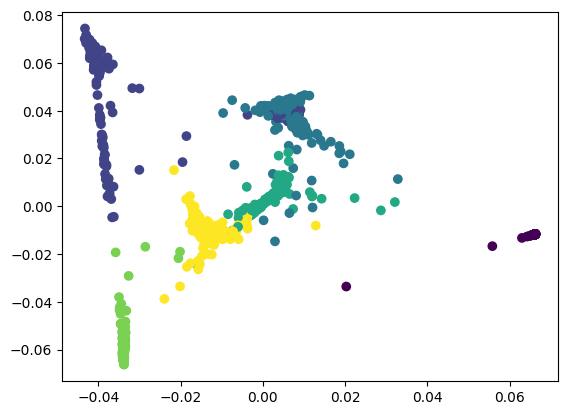

In [191]:
# ## THIS IS A TEST

## LLE algorithm

d = 2

I = np.eye(n)
M = (I - W).T @ (I - W)

eigvalues, eigvectors = np.linalg.eig(M)
print(sorted(np.abs(eigvalues)))
index_ = np.argsort(np.abs(eigvalues))[1:d+1]
lle_data = eigvectors[:, index_]

plt.scatter(lle_data[:, 0], lle_data[:, 1], c=y_train)
plt.show()